In [0]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Practice").getOrCreate()
orders = spark.table('default.orders_data_csv')
     

In [0]:
orders.show(5)

+------+--------------+--------+----------+-------------+-----------+---------------+-----------+----------------+----------------+--------------------+-----------------+--------------------+-------+-----------------+---------+-----------+----------+---------+--------+--------------------+-------+--------+
|Row ID|Order Priority|Discount|Unit Price|Shipping Cost|Customer ID|  Customer Name|  Ship Mode|Customer Segment|Product Category|Product Sub-Category|Product Container|        Product Name| Region|State or Province|     City|Postal Code|Order Date|Ship Date|  Profit|Quantity ordered new|  Sales|Order ID|
+------+--------------+--------+----------+-------------+-----------+---------------+-----------+----------------+----------------+--------------------+-----------------+--------------------+-------+-----------------+---------+-----------+----------+---------+--------+--------------------+-------+--------+
| 18606| Not Specified|    0.01|      2.88|          0.5|          2|Janice 

In [0]:
selected_columns = orders.select("Row ID", "Order Priority", "Discount","Unit Price","Shipping Cost","Customer ID")
selected_columns.show()

+------+--------------+--------+----------+-------------+-----------+
|Row ID|Order Priority|Discount|Unit Price|Shipping Cost|Customer ID|
+------+--------------+--------+----------+-------------+-----------+
| 18606| Not Specified|    0.01|      2.88|          0.5|          2|
| 20847|          High|    0.01|      2.84|         0.93|          3|
| 23086| Not Specified|    0.03|      6.68|         6.15|          3|
| 23087| Not Specified|    0.01|      5.68|          3.6|          3|
| 23088| Not Specified|       0|    205.99|          2.5|          3|
| 23597|        Medium|    0.09|     55.48|         14.3|          3|
| 25549|           Low|    0.08|    120.97|         26.3|          3|
| 20228| Not Specified|    0.02|    500.98|           26|          5|
| 19483|           Low|    0.08|      6.48|         6.81|          5|
| 24782|          High|    0.01|     90.24|         0.99|          6|
| 24563|      Critical|    0.07|      6.48|          6.6|          6|
| 24564|      Critic

In [0]:
column_dtypes = orders.dtypes
for column_name,data_type in column_dtypes:
    print(f" Column name :{column_name} Data Type is {data_type}")

 Column name :Row ID Data Type is string
 Column name :Order Priority Data Type is string
 Column name :Discount Data Type is string
 Column name :Unit Price Data Type is string
 Column name :Shipping Cost Data Type is string
 Column name :Customer ID Data Type is string
 Column name :Customer Name Data Type is string
 Column name :Ship Mode Data Type is string
 Column name :Customer Segment Data Type is string
 Column name :Product Category Data Type is string
 Column name :Product Sub-Category Data Type is string
 Column name :Product Container Data Type is string
 Column name :Product Name Data Type is string
 Column name :Region Data Type is string
 Column name :State or Province Data Type is string
 Column name :City Data Type is string
 Column name :Postal Code Data Type is string
 Column name :Order Date Data Type is string
 Column name :Ship Date Data Type is string
 Column name :Profit Data Type is string
 Column name :Quantity ordered new Data Type is string
 Column name :Sal

In [0]:
from pyspark.sql.functions import col
columns_to_convert = ["Row ID","Customer ID","Postal Code","Quantity ordered new","Order ID"]
for column in columns_to_convert:
    orders = orders.withColumn(column, col(column).cast("int"))

In [0]:
orders.printSchema()

root
 |-- Row ID: integer (nullable = true)
 |-- Order Priority: string (nullable = true)
 |-- Discount: string (nullable = true)
 |-- Unit Price: string (nullable = true)
 |-- Shipping Cost: string (nullable = true)
 |-- Customer ID: integer (nullable = true)
 |-- Customer Name: string (nullable = true)
 |-- Ship Mode: string (nullable = true)
 |-- Customer Segment: string (nullable = true)
 |-- Product Category: string (nullable = true)
 |-- Product Sub-Category: string (nullable = true)
 |-- Product Container: string (nullable = true)
 |-- Product Name: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- State or Province: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Postal Code: integer (nullable = true)
 |-- Order Date: string (nullable = true)
 |-- Ship Date: string (nullable = true)
 |-- Profit: string (nullable = true)
 |-- Quantity ordered new: integer (nullable = true)
 |-- Sales: string (nullable = true)
 |-- Order ID: integer (nullable =

In [0]:
columns_to_convert = ["Shipping Cost","Unit Price","Discount","Profit","Sales"]
for column in columns_to_convert:
    orders = orders.withColumn(column, col(column).cast("float"))

In [0]:
orders.printSchema()

root
 |-- Row ID: integer (nullable = true)
 |-- Order Priority: string (nullable = true)
 |-- Discount: float (nullable = true)
 |-- Unit Price: float (nullable = true)
 |-- Shipping Cost: float (nullable = true)
 |-- Customer ID: integer (nullable = true)
 |-- Customer Name: string (nullable = true)
 |-- Ship Mode: string (nullable = true)
 |-- Customer Segment: string (nullable = true)
 |-- Product Category: string (nullable = true)
 |-- Product Sub-Category: string (nullable = true)
 |-- Product Container: string (nullable = true)
 |-- Product Name: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- State or Province: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Postal Code: integer (nullable = true)
 |-- Order Date: string (nullable = true)
 |-- Ship Date: string (nullable = true)
 |-- Profit: float (nullable = true)
 |-- Quantity ordered new: integer (nullable = true)
 |-- Sales: float (nullable = true)
 |-- Order ID: integer (nullable = true

In [0]:
from pyspark.sql.functions import col, to_date
columns_to_convert = ["Order Date","Ship Date"]
for column in columns_to_convert:
    orders = orders.withColumn(column, to_date(col(column), "yyyy-MM-dd"))

In [0]:
orders.printSchema()

root
 |-- Row ID: integer (nullable = true)
 |-- Order Priority: string (nullable = true)
 |-- Discount: float (nullable = true)
 |-- Unit Price: float (nullable = true)
 |-- Shipping Cost: float (nullable = true)
 |-- Customer ID: integer (nullable = true)
 |-- Customer Name: string (nullable = true)
 |-- Ship Mode: string (nullable = true)
 |-- Customer Segment: string (nullable = true)
 |-- Product Category: string (nullable = true)
 |-- Product Sub-Category: string (nullable = true)
 |-- Product Container: string (nullable = true)
 |-- Product Name: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- State or Province: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Postal Code: integer (nullable = true)
 |-- Order Date: date (nullable = true)
 |-- Ship Date: date (nullable = true)
 |-- Profit: float (nullable = true)
 |-- Quantity ordered new: integer (nullable = true)
 |-- Sales: float (nullable = true)
 |-- Order ID: integer (nullable = true)



In [0]:
from pyspark.sql.functions import sum
result = orders.groupBy("Order Priority").agg(sum("Shipping Cost").alias("Total Shipping Cost"))
# Show the result
result.show()

+--------------+-------------------+
|Order Priority|Total Shipping Cost|
+--------------+-------------------+
|          High| 25178.049859404564|
|           Low| 25512.819873213768|
|     Critical |  2.990000009536743|
|        Medium| 23205.439936041832|
|      Critical| 23277.219884574413|
| Not Specified| 23430.489893317223|
+--------------+-------------------+



In [0]:
from pyspark.sql.functions import sum
result = orders.groupBy("Ship Mode").agg(sum("Shipping Cost").alias("Total Shipping Cost"))
# Show the result
result.show()

+--------------+-------------------+
|     Ship Mode|Total Shipping Cost|
+--------------+-------------------+
|Delivery Truck| 57987.969707489014|
|   Regular Air|  53719.67978364229|
|   Express Air|   8899.35995543003|
+--------------+-------------------+



In [0]:
from pyspark.sql.functions import sum
result = orders.groupBy("Ship Mode").agg(sum("Shipping Cost").alias("Total Shipping Cost"))
# Show the result
result.show()

In [0]:
result = orders.groupBy("Order Priority").agg(
    sum("Shipping Cost").alias("Total Shipping Cost"),
    sum("Unit Price").alias("Total Unit Price")
)

# Show the result
result.show()

+--------------+-------------------+------------------+
|Order Priority|Total Shipping Cost|  Total Unit Price|
+--------------+-------------------+------------------+
|          High| 25178.049859404564| 173858.2895758152|
|           Low| 25512.819873213768|161505.70964062214|
|     Critical |  2.990000009536743| 40.97999954223633|
|        Medium| 23205.439936041832|163629.58015358448|
|      Critical| 23277.219884574413|155303.85967123508|
| Not Specified| 23430.489893317223|178012.11977612972|
+--------------+-------------------+------------------+



In [0]:
result = orders.groupBy("Order Priority").agg(
    sum("Shipping Cost").alias("Total Shipping Cost"),
    sum("Unit Price").alias("Total Unit Price"),
    sum("Discount").alias("Total Discount")
)

# Show the result
result.show()

+--------------+-------------------+------------------+-------------------+
|Order Priority|Total Shipping Cost|  Total Unit Price|     Total Discount|
+--------------+-------------------+------------------+-------------------+
|          High| 25178.049859404564| 173858.2895758152|  97.72000023722649|
|           Low| 25512.819873213768|161505.70964062214|  96.96000021509826|
|     Critical |  2.990000009536743| 40.97999954223633|0.05999999865889549|
|        Medium| 23205.439936041832|163629.58015358448|  92.73000009171665|
|      Critical| 23277.219884574413|155303.85967123508|  89.39000002667308|
| Not Specified| 23430.489893317223|178012.11977612972|   90.9300001077354|
+--------------+-------------------+------------------+-------------------+



In [0]:
from pyspark.sql.functions import sum, round
result = orders.groupBy("Order Priority").agg(
    round(sum("Shipping Cost"), 2).alias("Total Shipping Cost"),
    round(sum("Unit Price"), 2).alias("Total Unit Price"),
    round(sum("Discount"), 2).alias("Total Discount")
)

# Show the result
result.show()

+--------------+-------------------+----------------+--------------+
|Order Priority|Total Shipping Cost|Total Unit Price|Total Discount|
+--------------+-------------------+----------------+--------------+
|          High|           25178.05|       173858.29|         97.72|
|           Low|           25512.82|       161505.71|         96.96|
|     Critical |               2.99|           40.98|          0.06|
|        Medium|           23205.44|       163629.58|         92.73|
|      Critical|           23277.22|       155303.86|         89.39|
| Not Specified|           23430.49|       178012.12|         90.93|
+--------------+-------------------+----------------+--------------+



In [0]:
from pyspark.sql.functions import sum, round
result = orders.groupBy("Order Priority").agg(
    round(sum("Shipping Cost"), 2).alias("Total Shipping Cost"),
    round(sum("Unit Price"), 2).alias("Total Unit Price"),
    round(sum("Discount"), 2).alias("Total Discount"),
    round(sum("Profit"), 2).alias("Total Profit")

)

# Show the result
result.show()

+--------------+-------------------+----------------+--------------+------------+
|Order Priority|Total Shipping Cost|Total Unit Price|Total Discount|Total Profit|
+--------------+-------------------+----------------+--------------+------------+
|          High|           25178.05|       173858.29|         97.72|   388824.31|
|           Low|           25512.82|       161505.71|         96.96|   280775.31|
|     Critical |               2.99|           40.98|          0.06|       -19.1|
|        Medium|           23205.44|       163629.58|         92.73|   251622.92|
|      Critical|           23277.22|       155303.86|         89.39|   191708.24|
| Not Specified|           23430.49|       178012.12|         90.93|   199530.71|
+--------------+-------------------+----------------+--------------+------------+



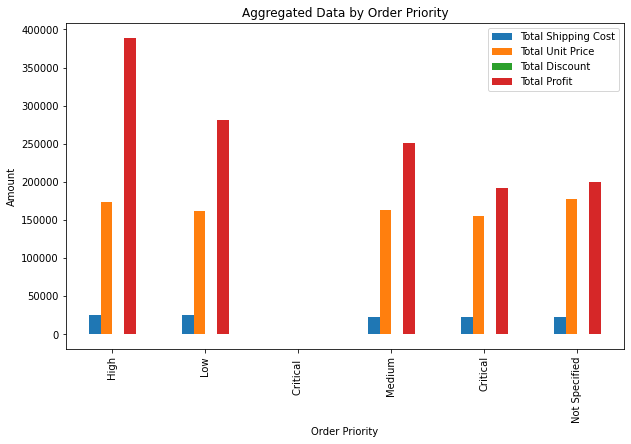

In [0]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the PySpark DataFrame to Pandas DataFrame
result_pd = result.toPandas()
result_pd.plot(x='Order Priority', kind='bar', figsize=(10, 6))
plt.xlabel('Order Priority')
plt.ylabel('Amount')
plt.title('Aggregated Data by Order Priority')
plt.legend()
plt.show()

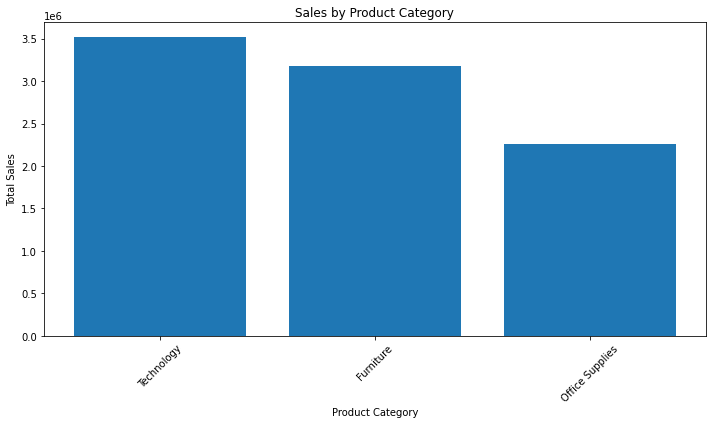

In [0]:
sales_by_category = orders.groupBy("Product Category").sum("Sales").withColumnRenamed("sum(Sales)", "Total Sales")
sales_by_category = sales_by_category.orderBy("Total Sales", ascending=False)

# Convert PySpark DataFrame to Pandas DataFrame for visualization
sales_by_category_pd = sales_by_category.toPandas()

# Visualization - Bar plot
plt.figure(figsize=(10, 6))
plt.bar(sales_by_category_pd["Product Category"], sales_by_category_pd["Total Sales"])
plt.xlabel("Product Category")
plt.ylabel("Total Sales")
plt.title("Sales by Product Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

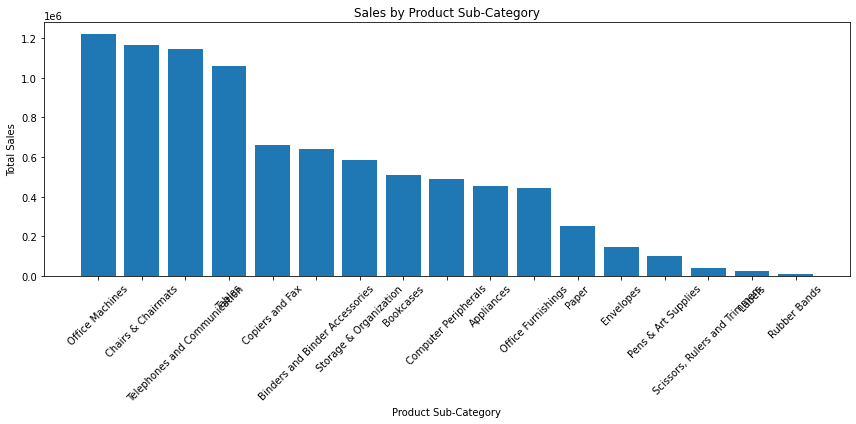

In [0]:
sales_by_subcategory = orders.groupBy("Product Sub-Category").sum("Sales").withColumnRenamed("sum(Sales)", "Total Sales")
sales_by_subcategory = sales_by_subcategory.orderBy("Total Sales", ascending=False)
sales_by_subcategory_pd = sales_by_subcategory.toPandas()

plt.figure(figsize=(12, 6))
plt.bar(sales_by_subcategory_pd["Product Sub-Category"], sales_by_subcategory_pd["Total Sales"])
plt.xlabel("Product Sub-Category")
plt.ylabel("Total Sales")
plt.title("Sales by Product Sub-Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


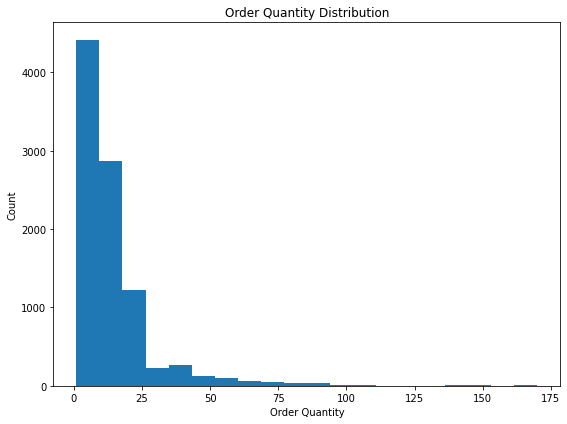

In [0]:
order_quantity_pd = orders.select("Quantity ordered new").toPandas()

plt.figure(figsize=(8, 6))
plt.hist(order_quantity_pd["Quantity ordered new"], bins=20)
plt.xlabel("Order Quantity")
plt.ylabel("Count")
plt.title("Order Quantity Distribution")
plt.tight_layout()
plt.show()

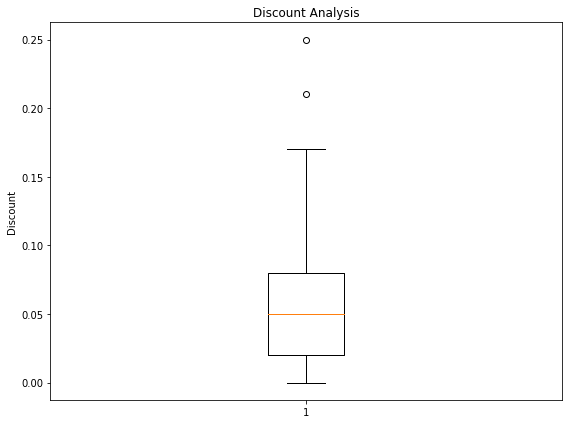

In [0]:
discount_analysis_pd = orders.select("Discount").toPandas()

plt.figure(figsize=(8, 6))
plt.boxplot(discount_analysis_pd["Discount"])
plt.ylabel("Discount")
plt.title("Discount Analysis")
plt.tight_layout()
plt.show()


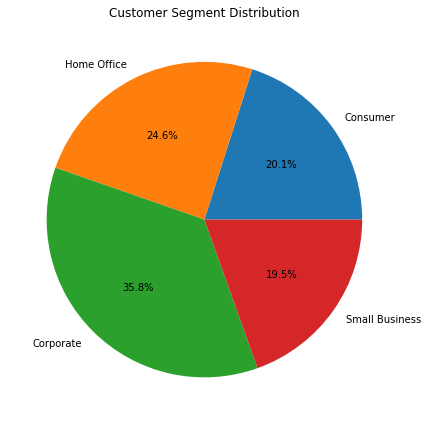

In [0]:
customer_segment = orders.groupBy("Customer Segment").count().withColumnRenamed("count", "Count")
customer_segment_pd = customer_segment.toPandas()

plt.figure(figsize=(8, 6))
plt.pie(customer_segment_pd["Count"], labels=customer_segment_pd["Customer Segment"], autopct='%1.1f%%')
plt.title("Customer Segment Distribution")
plt.tight_layout()
plt.show()


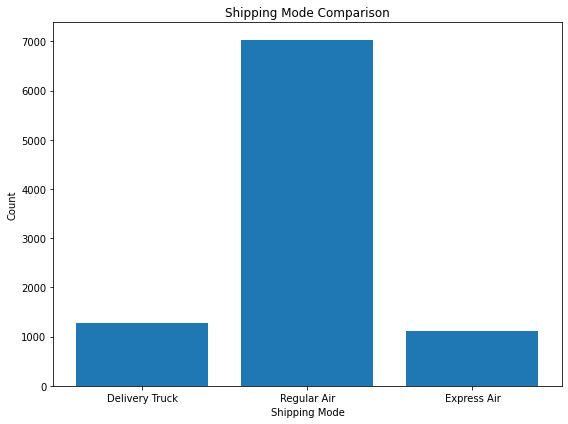

In [0]:
shipping_mode = orders.groupBy("Ship Mode").count().withColumnRenamed("count", "Count")
shipping_mode_pd = shipping_mode.toPandas()

plt.figure(figsize=(8, 6))
plt.bar(shipping_mode_pd["Ship Mode"], shipping_mode_pd["Count"])
plt.xlabel("Shipping Mode")
plt.ylabel("Count")
plt.title("Shipping Mode Comparison")
plt.tight_layout()
plt.show()


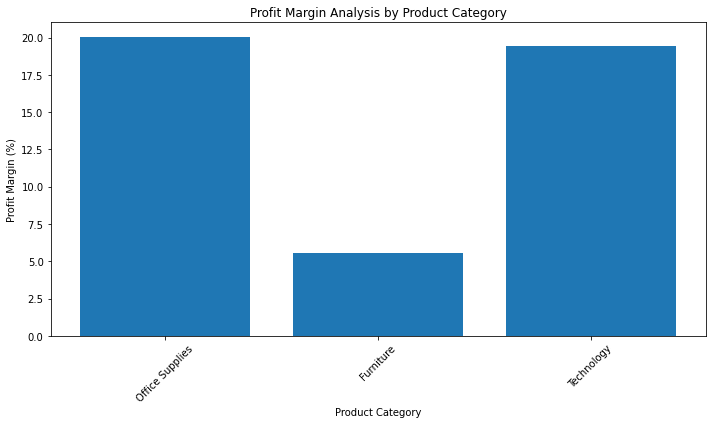

In [0]:
profit_margin = orders.groupBy("Product Category").agg((sum("Profit") / sum("Sales") * 100).alias("Profit Margin"))
profit_margin_pd = profit_margin.toPandas()

plt.figure(figsize=(10, 6))
plt.bar(profit_margin_pd["Product Category"], profit_margin_pd["Profit Margin"])
plt.xlabel("Product Category")
plt.ylabel("Profit Margin (%)")
plt.title("Profit Margin Analysis by Product Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


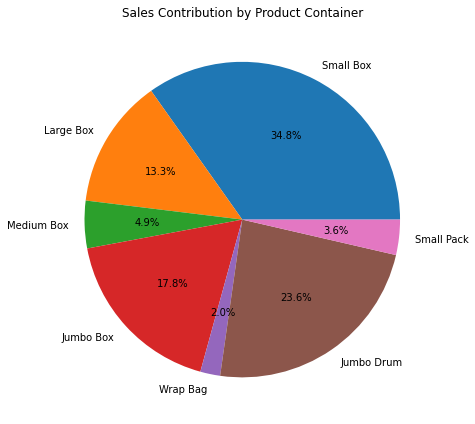

In [0]:
sales_by_container = orders.groupBy("Product Container").sum("Sales").withColumnRenamed("sum(Sales)", "Total Sales")
sales_by_container_pd = sales_by_container.toPandas()

plt.figure(figsize=(10, 6))
plt.pie(sales_by_container_pd["Total Sales"], labels=sales_by_container_pd["Product Container"], autopct='%1.1f%%')
plt.title("Sales Contribution by Product Container")
plt.tight_layout()
plt.show()
